In [ ]:
# all plots
import numpy as np
import matplotlib.pyplot as plt
import glob

# Define parameters and simulations
parameters = ['Ωm', 'σ8', 'ASN1', 'AAGN1', 'ASN2', 'AAGN2']
simulations = ['IllustrisTNG', 'Simba', 'Astrid']#, 'Swift-EAGLE']

# Set up the plot
fig, axes = plt.subplots(len(simulations), len(parameters), figsize=(20, 16), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Color map for different parameter values
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Assuming 5 different values per parameter

# Function to read UVLF data from file
def read_uvlf_data(filename):
    data = np.loadtxt(filename)
    return data[:, 0], data[:, 1]  # Assuming first column is M_FUV, second is phi

# Plot UVLFs
for i, sim in enumerate(simulations):
    for j, param in enumerate(parameters):
        ax = axes[i, j]
        
        # Read and plot data for each parameter value
        for k, color in enumerate(colors):
            filename = f"path/to/your/data/{sim}_{param}_{k}.txt"  # Adjust this path
            try:
                M_FUV, phi = read_uvlf_data(filename)
                ax.plot(M_FUV, np.log10(phi), color=color, lw=2)
            except FileNotFoundError:
                print(f"File not found: {filename}")
        
        # Set labels and titles
        if i == len(simulations) - 1:
            ax.set_xlabel('$M_{FUV}$')
        if j == 0:
            ax.set_ylabel('$\log_{10}(\phi / \mathrm{Mpc}^{-3} \mathrm{dex}^{-1})$')
        if i == 0:
            ax.set_title(param)
        
        # Set axis limits and invert x-axis
        ax.set_xlim(-22, -16)
        ax.set_ylim(-5, -2)
        ax.invert_xaxis()
        
        # Add simulation name to the right side of the rightmost plot
        if j == len(parameters) - 1:
            ax.text(1.05, 0.5, sim, transform=ax.transAxes, rotation=-90, va='center')

# Add a common colorbar
cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
cbar = fig.colorbar(sm, cax=cax)
cbar.set_label('Parameter values', rotation=-90, va='bottom')

# Add overall title
fig.suptitle('UV Luminosity Functions for Different Parameters and Simulations', fontsize=16)

# Save the figure
plt.savefig('UVLF_multi_panel.png', dpi=300, bbox_inches='tight')
plt.close()

print("Plot saved as UVLF_multi_panel.png")

/tmp/ipykernel_2650/1527352954.py:29: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True)
/tmp/ipykernel_2650/1527352954.py:63: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(M_range, phi_schechter_fit, 'k-', linewidth=1.5, linestyle='--')
/tmp/ipykernel_2650/1527352954.py:29: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(filename, delim_whitespace=True)
/tmp/ipykernel_2650/1527352954.py:63: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "k-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(M_range, phi_schechter_fit, 'k-',

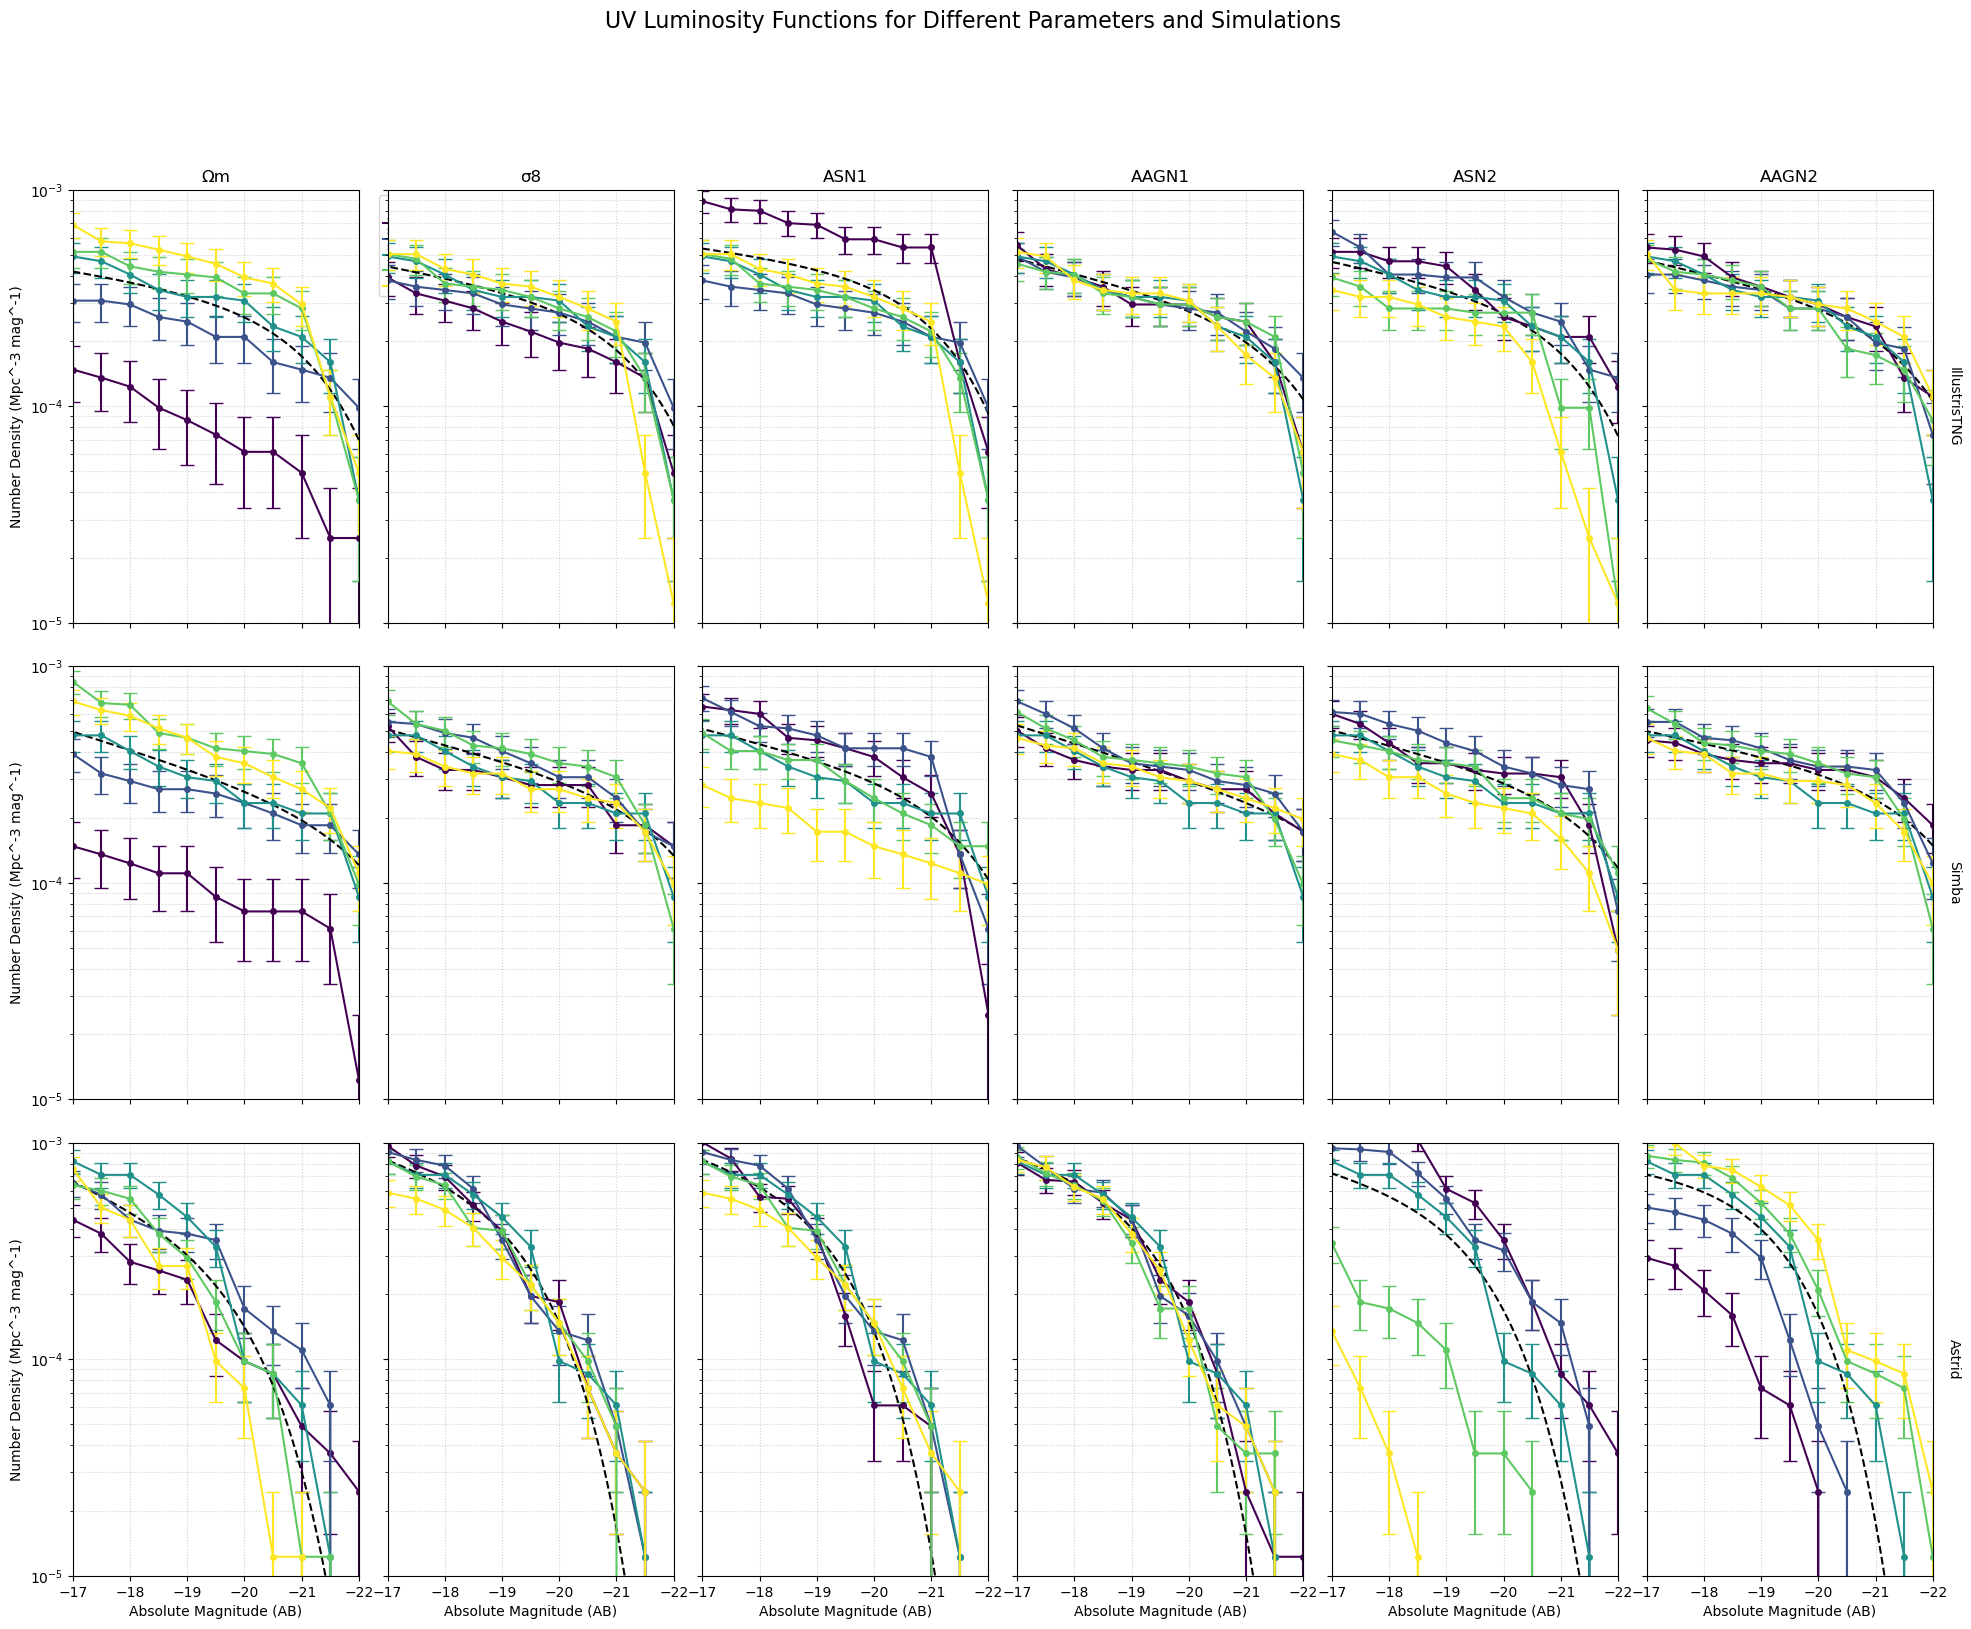

Plot saved as UVLF_multi_panel.png


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
import os

# Schechter function
def schechter(M, alpha, M_star, phi_star):
    return 0.4 * np.log(10) * phi_star * (10 ** (0.4 * (M_star - M))) ** (alpha + 1) * np.exp(-10 ** (0.4 * (M_star - M)))

# Define parameters and simulations
parameters = ['OmegaM', 'Sigma8', 'SN1', 'AGN1', 'SN2', 'AGN2']
param_labels = ['Ωm', 'σ8', 'ASN1', 'AAGN1', 'ASN2', 'AAGN2']
simulations = ['IllustrisTNG', 'Simba', 'Astrid']
sim_names = ['IllTNG', 'SIMBA', 'Astrid']

# Set up the plot
fig, axes = plt.subplots(len(simulations), len(parameters), figsize=(24, 18), sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.1, wspace=0.1)

# Define mass bin limits
massBinLimits = np.arange(-22, -16, 0.5)

# Color map for different parameter values
colors = plt.cm.viridis(np.linspace(0, 1, 5))  # Assuming 5 different values per parameter

# Function to read UVLF data from file
def read_uvlf_data(filename):
    return pd.read_csv(filename, delim_whitespace=True)

# Plot UVLFs
for i, (sim, sim_name) in enumerate(zip(simulations, sim_names)):
    for j, (param, param_label) in enumerate(zip(parameters, param_labels)):
        ax = axes[i, j]
        
        # Read and plot data for each parameter value
        filename = f"/home/jovyan/camels/1P_set/1P_outputs/{sim}/LF_1P_{param}_{sim_name}.txt"
        try:
            df = read_uvlf_data(filename)
            
            param_values = df[param].unique()
            all_M = []
            all_phi = []
            for k, param_value in enumerate(param_values):
                subset = df[df[param] == param_value].sort_values('hist')
                
                ax.errorbar(massBinLimits[:-1], subset['phi'], yerr=subset['phi_sigma'], 
                            fmt='o-', color=colors[k], label=f'{param} = {param_value:.2f}', 
                            capsize=5, markersize=4, linewidth=1.5)
                
                all_M.extend(massBinLimits[:-1])
                all_phi.extend(subset['phi'])
            
            # Fit Schechter function
            all_M = np.array(all_M)
            all_phi = np.array(all_phi)
            initial_guess = [-1.55, -19.49, 1.69e-3]
            popt, _ = curve_fit(schechter, all_M, all_phi, p0=initial_guess)
            
            # Plot fitted Schechter function
            M_range = np.linspace(min(all_M), max(all_M), 100)
            phi_schechter_fit = schechter(M_range, *popt)
            ax.plot(M_range, phi_schechter_fit, 'k-', linewidth=1.5, linestyle='--')
            
        except FileNotFoundError:
            print(f"File not found: {filename}")
        except Exception as e:
            print(f"Error processing {filename}: {str(e)}")
        
        # Set labels and titles
        if i == len(simulations) - 1:
            ax.set_xlabel('Absolute Magnitude (AB)')
        if j == 0:
            ax.set_ylabel('Number Density (Mpc^-3 mag^-1)')
        if i == 0:
            ax.set_title(param_label)
        
        # Set axis properties
        ax.set_yscale('log')
        ax.set_xlim(-22, -17)
        ax.set_ylim(1e-5, 1e-3)
        ax.invert_xaxis()
        ax.grid(True, which='both', linestyle=':', alpha=0.6)
        
        # Add simulation name to the right side of the rightmost plot
        if j == len(parameters) - 1:
            ax.text(1.05, 0.5, sim, transform=ax.transAxes, rotation=-90, va='center')

        # Add legend to the first plot only
        if i == 0 and j == 0:
            ax.legend(title='Parameter value', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Add overall title
fig.suptitle('UV Luminosity Functions for Different Parameters and Simulations', fontsize=16)

# Save the figure
plt.savefig('UVLF_multi_panel.png', dpi=300, bbox_inches='tight')
plt.show()
#plt.close()
print("Plot saved as UVLF_multi_panel.png")